## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Binny 7189
# student 2: Bar 3026
# student 3: Matan 5292
# student 4: Adi 8490
# (optional) student 5: Yarden 5696
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
#import all relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  




In [3]:
#loading the data sets 
df_test = pd.read_csv('wine_test.csv')
df_train = pd.read_csv('wine_train.csv')

# presenting 5 first rows of each data set
display(df_test.head())
display(df_train.head())


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,target,total count
0,1,57
1,0,48
2,2,37


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

None

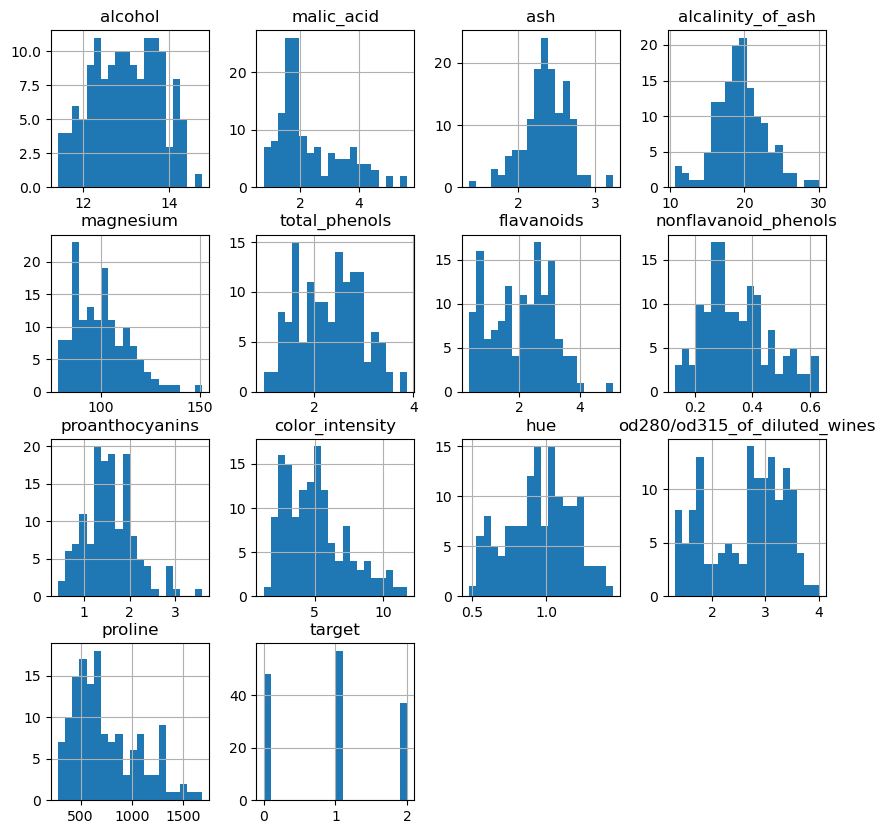

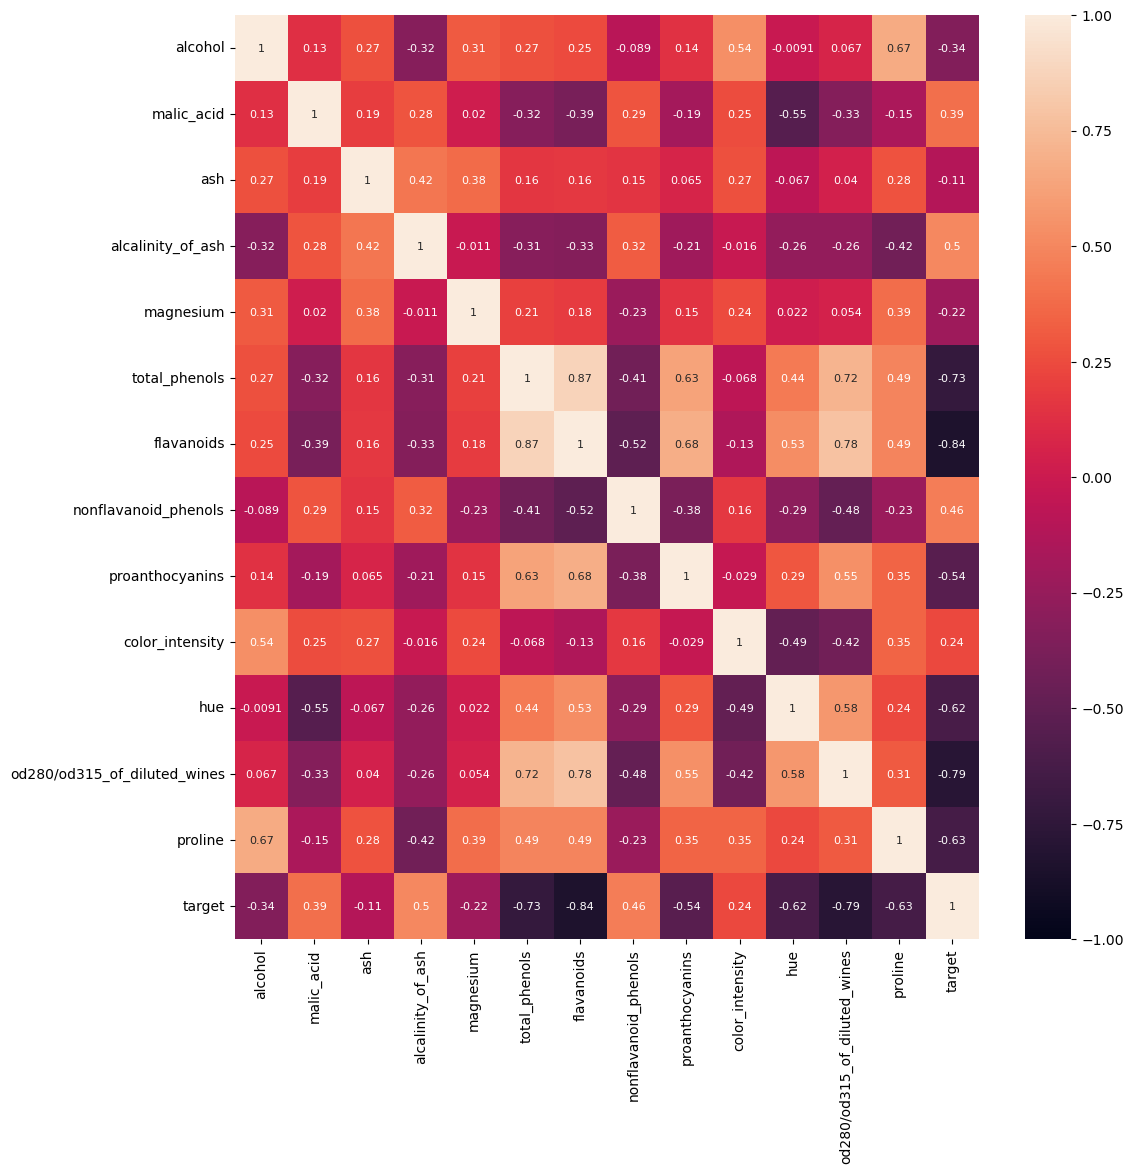

In [4]:
#EDA - visualization

#display the different target values of wine
display(df_train['target'].value_counts().reset_index(name='total count'))

#display statistics of the dataset
display(df_train.describe())
display(df_train.info())

#histogram of each feature - easy to notice the bell shape in each one
df_train.hist(bins=20, figsize=(10, 10))
plt.show()

#heatmap of all the features - curralation between the features
corr_matrix = df_train.corr()
plt.figure(figsize=(12, 12))
sb.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 8}, vmin=-1, vmax=1)
plt.show()


In [5]:
# Covariance matrix
cov_matrix = df_train.cov()

# Pearson correlation matrix
corr_matrix = df_train.corr()

In [6]:
#Feature engineering 

# Select features with high correlation to 'target' - feature selection
threshold = 0.7  
important_features = corr_matrix['target'][abs(corr_matrix['target']) > threshold].index
important_features = important_features.drop('target')
print(important_features)

# Select these features for the model
X = df_train[important_features]
y = df_train['target']

Index(['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines'], dtype='object')


In [7]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# PCA - dimentsion reduction
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(142, 2)


In [14]:
#Model training

# Shuffle the data
df_train = shuffle(df_train, random_state=42)

# Redistributes the data after mixing
X = df_train.drop(columns=['target'])
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#KNN model without scaling
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (No Scaling): {accuracy:.2f}")

# KNN model with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"KNN Accuracy (With Scaling): {accuracy_scaled:.2f}")

#SVM model without scaling    
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy (No Scaling): {accuracy_svm:.2f}")

#SVM model with scaling    
svm_model_scaled = SVC()
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm_model_scaled.predict(X_test_scaled)
accuracy_svm_scaled = accuracy_score(y_test, y_pred_svm_scaled)
print(f"SVM Accuracy (With Scaling): {accuracy_svm_scaled:.2f}")

#Desicion Tree model without scaling
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: (No Scaling) {accuracy_tree:.2f}")


#Desicion Tree model with scaling
tree_model_scaled = DecisionTreeClassifier(max_depth=3)
tree_model_scaled.fit(X_train_scaled, y_train)
y_pred_tree_scaled = tree_model_scaled.predict(X_test_scaled)
accuracy_tree_scaled = accuracy_score(y_test, y_pred_tree_scaled)
print(f"Decision Tree Accuracy (with Scaling): {accuracy_tree_scaled:.2f}")





KNN Accuracy (No Scaling): 0.72
KNN Accuracy (With Scaling): 0.93
SVM Accuracy (No Scaling): 0.69
SVM Accuracy (With Scaling): 0.93
Decision Tree Accuracy: (No Scaling) 0.83
Decision Tree Accuracy (with Scaling): 0.90


In [17]:
#Choosing the optimal permutation 5-fold-cross-validation using the search Grid method

# Define the classifiers and their hyperparameters
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Artificial Neural Network': MLPClassifier(max_iter=10000),
    'Random Forest': RandomForestClassifier()
}

# Define hyperparameters for each classifier
param_grids = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'Naive Bayes': {},  # Naive Bayes has no hyperparameters to tune
    'Artificial Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_features': [ 'sqrt', 'log2'], 'min_samples_split': [2, 10, 20]}
}

In [18]:
# Define the scorer for F1-macro
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Perform grid search with 5-fold cross-validation and find the best parameters
best_estimators = {}
for model_name, model in classifiers.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=f1_macro_scorer)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {model_name}: {grid_search.best_score_}")


# Comparison of results
# Compile results into a DataFrame for comparison
results = {
    'Model': [],
    'Best Params': [],
    'Best F1 Score': []
}
for model_name, estimator in best_estimators.items():
    results['Model'].append(model_name)
    results['Best Params'].append(estimator.get_params())
    results['Best F1 Score'].append(cross_val_score(estimator, X_train, y_train, cv=5, scoring=f1_macro_scorer).mean())

results_df = pd.DataFrame(results)
print("\nComparison of Results:")
display(results_df)

# Choosing the best model

# Identify the best model based on the highest F1 score
best_model_name = results_df.loc[results_df['Best F1 Score'].idxmax()]['Model']
best_model = best_estimators[best_model_name]
print(f"\nBest Model: {best_model_name} with params: {results_df.loc[results_df['Best F1 Score'].idxmax()]['Best Params']}")


Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_split': 2}
Best cross-validation F1 score for Decision Tree: 0.8913595188208191

Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation F1 score for K-Nearest Neighbors: 0.7598703354895305

Best parameters for Naive Bayes: {}
Best cross-validation F1 score for Naive Bayes: 0.984203646370829

Best parameters for Artificial Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best cross-validation F1 score for Artificial Neural Network: 0.9745209176788124

Best parameters for Random Forest: {'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation F1 score for Random Forest: 0.9921568627450981

Comparison of Results:


,Model,Best Params,Best F1 Score
0,Decision Tree,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.874091
1,K-Nearest Neighbors,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.759870
2,Naive Bayes,"{'priors': None, 'var_smoothing': 1e-09}",0.984204
3,Artificial Neural Network,"{'activation': 'tanh', 'alpha': 0.0001, 'batch...",0.975728
4,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.992157



Best Model: Random Forest with params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [19]:
# Train the model with best combination

def train_and_evaluate_best_model(X_train, y_train, X_test, y_test, best_model_name):

    if best_model_name not in classifiers:
        raise ValueError(f"Invalid model name: {best_model_name}")

    clf = classifiers[best_model_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    results = {
        'accuracy': accuracy,
        'classification_report': classification_rep
    }
    return results

results = train_and_evaluate_best_model(X_train, y_train, X_test, y_test, best_model_name)

#Show the results
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Best Model Name is : {best_model_name}")
print("Classification Report:")
print(results['classification_report'])

Accuracy: 0.9310
Best Model Name is : Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.85      0.92        13
           2       0.80      1.00      0.89         8

    accuracy                           0.93        29
   macro avg       0.93      0.95      0.94        29
weighted avg       0.94      0.93      0.93        29



## Part 4 - Apply on test and show model performance estimation

In [20]:
# Model revision
# Apply the selected engineering feature to the test and predict the test samples in the model(chosen model)
if best_estimators[best_model_name] == 'Yes':
    X_test_final = scaler.transform( X_test)
else:
    X_test_final =  X_test

# Prediction on the test set
test_preds_final = best_model.predict(X_test_final)

# results on the test set
accuracy_test_final = accuracy_score(y_test, test_preds_final)
report_test_final = classification_report(y_test, test_preds_final, target_names=['0', '1', '2'])

#Printing the model results on the test set
print("Results on dataset")
print("==========================")
print(f"Final Precision {accuracy_test_final:.4f}")
print("==========================\n")
print("Final classification report")
print("==========================\n")
print(report_test_final)
print("==========================")


Results on dataset
Final Precision 0.9310

Final classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.85      0.92        13
           2       0.80      1.00      0.89         8

    accuracy                           0.93        29
   macro avg       0.93      0.95      0.94        29
weighted avg       0.94      0.93      0.93        29

